# Sentiment Analysis with VADERSentiments

* python script for sentiment analysis with vader classifier

## Install and import required libraries and packages

In [1]:
!pip install spacy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!python -m spacy download en_core_web_sm

2022-10-27 21:17:52.453939: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import re
import random
from google.colab import drive
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Vader classifier on labeled test dataset

### Read dataset

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# test data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_labeled_test.csv')

df

,Unnamed: 0,raw_text,clean_text,subjectivity,polarity
0,0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1
1,1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
2,2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
3,3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
4,4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0
...,...,...,...,...,...
349,349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
350,350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
351,351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
352,352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


In [7]:
df.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text', 'subjectivity', 'polarity'], dtype='object')

In [8]:
df = df.drop('Unnamed: 0', axis=1)

df

,raw_text,clean_text,subjectivity,polarity
0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1
1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0
...,...,...,...,...
349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


### Vader sentiment analysis

* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

In [9]:
def vader_analysis(sentence):
  classifier = SentimentIntensityAnalyzer()
  result = classifier.polarity_scores(sentence)
  score = result['compound']

  if score >= 0.05: # pos
    result = 1 
  elif score > -0.05 and score < 0.05: # neu
    result = 2
  else: # neg
    result = 0
  
  return result

In [10]:
# add vader scores to dataframe
df['vader_score'] = df['clean_text'].apply(vader_analysis)

df

,raw_text,clean_text,subjectivity,polarity,vader_score
0,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,1,2
1,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2,2
2,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2,1
3,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0,0
4,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,0,0
...,...,...,...,...,...
349,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1,1
350,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2,1
351,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0,1
352,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2,1


### Export results

In [11]:
# labeled test data
vader_label_file_name = 'vader_results_test_labeled.csv'
  
df.to_csv(vader_label_file_name)

### Evaluate model

In [12]:
vader_predict = df['vader_score'].values

In [13]:
vader_predict

array([2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2,
       1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1,
       1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2,
       0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1,
       2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0,

In [14]:
true_predict = df['polarity'].values

In [15]:
true_predict

array([1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1,
       2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1,

In [16]:
acc_score = accuracy_score(true_predict, vader_predict)

print("vader accuracy: ", str(acc_score))

vader accuracy:  0.4406779661016949


In [17]:
print(classification_report(true_predict, vader_predict))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50       167
           1       0.36      0.60      0.45        96
           2       0.34      0.34      0.34        91

    accuracy                           0.44       354
   macro avg       0.45      0.45      0.43       354
weighted avg       0.49      0.44      0.44       354



## Apply on full dataset

### Read dataset

In [18]:
# full data
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Sentiment Analysis/final datasets/biden_tweets_processed.csv')

df_full

,Unnamed: 0,raw_text,clean_text
0,0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...,...
17626,17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


In [19]:
df_full.columns

Index(['Unnamed: 0', 'raw_text', 'clean_text'], dtype='object')

In [20]:
df_full = df_full.drop('Unnamed: 0', axis=1)

df_full

,raw_text,clean_text
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


### Vader sentiment analysis

In [21]:
# add vader scores to dataframe
df_full['vader_score'] = df_full['clean_text'].apply(vader_analysis)

df_full

,raw_text,clean_text,vader_score
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...,1
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...,0
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...,1
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...,1
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...,2
...,...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...,0
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...,0
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,1
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,0


### Results summary

In [22]:
total_counts = len(df_full.index)

total_counts

17631

In [23]:
df_full['vader_score'].unique()

array([1, 0, 2])

In [24]:
vader_counts = df_full['vader_score'].value_counts()

vader_counts

1    7652
0    5816
2    4163
Name: vader_score, dtype: int64

In [25]:
neg_counts = df_full['vader_score'].value_counts()[0]

neg_counts

5816

In [26]:
pos_counts = df_full['vader_score'].value_counts()[1]

pos_counts

7652

In [27]:
neu_counts = df_full['vader_score'].value_counts()[2]

neu_counts

4163

In [28]:
print("Total number of tweets: " + str(total_counts))
print('\n')
print("Number of negative tweets: " + str(neg_counts))
print("Number of positive tweets: " + str(pos_counts))
print("Number of neutral tweets: " + str(neu_counts))

Total number of tweets: 17631


Number of negative tweets: 5816
Number of positive tweets: 7652
Number of neutral tweets: 4163


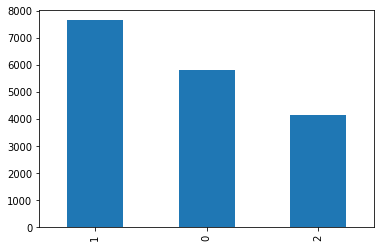

In [29]:
df_full['vader_score'].value_counts().plot.bar()

### Export results

In [30]:
# full data
vader_file_name = 'vader_results_full.csv'
  
df_full.to_csv(vader_file_name)